In [37]:
import sys
sys.path.append("../")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
from gw_eccentricity.gw_eccentricity import measure_eccentricity
from gw_eccentricity.load_data import load_waveform
from gw_eccentricity.plot_settings import use_fancy_plotsettings, figWidthsTwoColDict, figHeightsDict

In [39]:
import glob
import re
from tqdm import tqdm
import matplotlib.pyplot as plt

In [40]:
help(measure_eccentricity)

Help on function measure_eccentricity in module gw_eccentricity.gw_eccentricity:

measure_eccentricity(tref_in=None, fref_in=None, method='Amplitude', dataDict=None, return_gwecc_object=False, spline_kwargs=None, extra_kwargs=None)
    Measure eccentricity and mean anomaly from a gravitational waveform.
    
    Eccentricity is measured using the GW frequency omega22(t) = dphi22(t)/dt,
    where phi22(t) is the phase of the (2,2) waveform mode. We evaluate
    omega22(t) at pericenter times, t_pericenters, and build a spline interpolant
    omega22_pericenters(t) using those points. Similarly, we build omega22_apocenters(t)
    using the apocenter times, t_apocenters. To find the pericenter/apocenter
    locations, one can look for extrema in different waveform data, like
    omega22(t) or Amp22(t), the amplitude of the (2,2) mode. Pericenters
    correspond to pericenters, while apocenters correspond to apocenters in the data.
    The method option (described below) lets you pick whic

In [41]:
averaging_methods = ["mean_of_extrema_interpolants", "interpolate_orbit_averages_at_extrema", "omega22_zeroecc"]

In [42]:
eob_waveforms = sorted(glob.glob("../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_*_Momega00.010_meanAno1.571.h5"))[135:150:2]

In [43]:
eob_waveforms

['../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.2199286859_Momega00.010_meanAno1.571.h5',
 '../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.2730496415_Momega00.010_meanAno1.571.h5',
 '../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.3390012833_Momega00.010_meanAno1.571.h5',
 '../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.4208826990_Momega00.010_meanAno1.571.h5',
 '../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.5225415214_Momega00.010_meanAno1.571.h5',
 '../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.6487547295_Momega00.010_meanAno1.571.h5',
 '../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.8054531206_Momega00.010_meanAno1.571.h5',
 '../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc1.0000000000

In [44]:
zeroecc_waveform = "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.0000000000_Momega00.002_meanAno1.571.h5"

0it [00:00, ?it/s]/home1/md.shaikh/Eccentricity/notebook/../gw_eccentricity/eccDefinition.py:647: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")
/home1/md.shaikh/Eccentricity/notebook/../gw_eccentricity/eccDefinition.py:647: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")
/home1/md.shaikh/Eccentricity/notebook/../gw_eccentricity/eccDefinition.py:647: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")
2it [00:08,  4.17s/it]/home1/md.shaikh/Eccentricity/notebook/../gw_eccentricity/eccDefinition.py:647: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")
/home1/md.shaikh/Eccentricity/notebook/../gw_eccentricity/eccDefinition.py:647: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")
/home1/md.shaikh/Eccentricity/notebook/../gw_eccentricity/eccDefinition.py:647: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non m

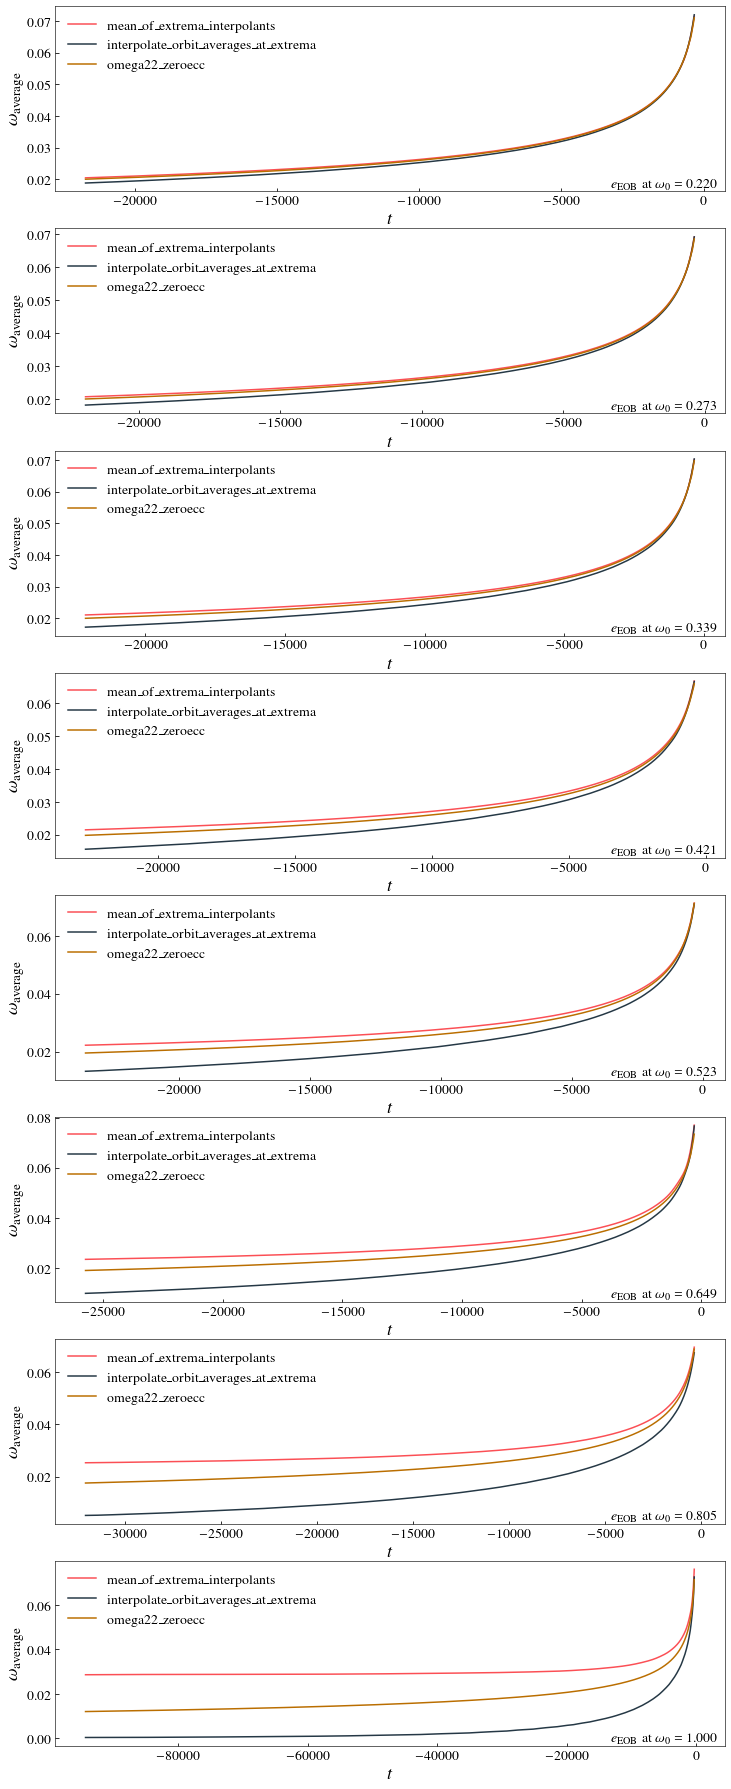

In [54]:
nrows = len(eob_waveforms)
style = "Notebook"
method = "ResidualAmplitude"
use_fancy_plotsettings(style=style)
fig, axes = plt.subplots(nrows=nrows, figsize=(figWidthsTwoColDict[style], nrows * figHeightsDict[style]))
for idx, waveform in tqdm(enumerate(eob_waveforms)):
    ecc = float(re.search("\d.\d{10}", waveform)[0])
    # laod data
    kwargs = {"filepath": waveform,
             "filepath_zero_ecc": zeroecc_waveform,
             "include_zero_ecc": True}
    dataDict = load_waveform("EOB", **kwargs)
    fref_in = 0.01
    for omega_avg_method in averaging_methods:
        fref_out, ecc_ref, mean_ano_ref, gwecc_obj = measure_eccentricity(
            fref_in=fref_in, dataDict=dataDict, method=method, return_gwecc_object=True,
            extra_kwargs={"omega22_averaging_method": omega_avg_method})
        axes[idx].plot(gwecc_obj.t_for_omega22_average, gwecc_obj.omega22_average, label=omega_avg_method)
    axes[idx].legend()
    axes[idx].set_xlabel(r"$t$")
    axes[idx].set_ylabel(r"$\omega_\mathrm{average}$")
    axes[idx].text(0.99, 0.01, f"$e_\mathrm{{EOB}}$ at $\omega_0$ = {ecc:.3f}", va="bottom", ha="right", transform=axes[idx].transAxes)

In [55]:
fig.tight_layout()
fig.savefig("compare_omega_averaging_methods.png")